# **Laboratorijska vježba 7**: Zadaci za samostalni rad

## **Predviđanje udomljavanja životinja**

U ovoj laboratorijskoj vježbi istražit ćemo skup podataka koji sadrži podatke o životinjama iz skloništa za životinje. Cilj je izgraditi i trenirati algoritam strojnog učenja koji će predvidjeti hoće li životinja iz skloništa biti udomljena ili ne. Skup podataka sadrži sljedeće značajke:

* animal_type - tip životinje
* intake_year - godina primanja u sklonište
* intake_condition - stanje životinje pri primanju u sklonište
* intake_number - broj slučajeva kada je ista životinja dovedena u sklonište
* intake_type - tip donošenja u sklonište (primjerice, zalutala životinja, dobrovoljna predaja vlasnika,...)
* sex_upon_intake - spol životinje i informacija o kastriranju pri primanju
* age_upon_intake - dob životinje pri primanju
* time_in_shelter_days - broj dana koja je životinja provela u skloništu
* sex_upon_outcome - spol životinje i informacija o kastriranju pri donošenju odluke o udomljavanju
* age_upon_outcome - dob životinje pri donošenju odluke o udomljavanju
* outcome_type - odluka o udomljavanju

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import seaborn as sn
%matplotlib inline

data_folder = './Data/'

In [ ]:
data = pd.read_csv('Data/aac_intakes_outcomes.csv')
data.head(5)

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,...,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
0,10 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,...,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194
1,7 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,...,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722
2,6 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,...,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,...,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139
4,16 years,A134067,1997-10-16 00:00:00,NaN,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,...,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444


## **Zadatak 1: Transformacija značajki**

Uredite skup podataka na način da rukujete s nedostajućim vrijednostima. Provjerite ima li takvih vrijednosti te ih uklonite ili nadomjestite prikladnim vrijednostima.



In [ ]:
missing_values = data.isna().sum()
print(missing_values)

#outcome_type_nan = data['outcome_type'].isna() #bool
#data[outcome_type_nan == 'True'] 
#data.drop(data.loc[data['outcome_type'] == np.nan].index, inplace=True)
#data.isnull().sum().sum()
#data.dropna(inplace=True)

data = data[data.outcome_subtype.notnull()] #uzimam u obzir one vrijednosti koje imaju outcome_subtype
data.isna().sum()

#print(data.count())#79672

age_upon_outcome                  0
animal_id_outcome                 0
date_of_birth                     0
outcome_subtype               43324
outcome_type                     10
sex_upon_outcome                  1
age_upon_outcome_(days)           0
age_upon_outcome_(years)          0
age_upon_outcome_age_group        0
outcome_datetime                  0
outcome_month                     0
outcome_year                      0
outcome_monthyear                 0
outcome_weekday                   0
outcome_hour                      0
outcome_number                    0
dob_year                          0
dob_month                         0
dob_monthyear                     0
age_upon_intake                   0
animal_id_intake                  0
animal_type                       0
breed                             0
color                             0
found_location                    0
intake_condition                  0
intake_type                       0
sex_upon_intake             

age_upon_outcome              0
animal_id_outcome             0
date_of_birth                 0
outcome_subtype               0
outcome_type                  0
sex_upon_outcome              0
age_upon_outcome_(days)       0
age_upon_outcome_(years)      0
age_upon_outcome_age_group    0
outcome_datetime              0
outcome_month                 0
outcome_year                  0
outcome_monthyear             0
outcome_weekday               0
outcome_hour                  0
outcome_number                0
dob_year                      0
dob_month                     0
dob_monthyear                 0
age_upon_intake               0
animal_id_intake              0
animal_type                   0
breed                         0
color                         0
found_location                0
intake_condition              0
intake_type                   0
sex_upon_intake               0
count                         0
age_upon_intake_(days)        0
age_upon_intake_(years)       0
age_upon

In [ ]:
cols = [
    "animal_type",
    "intake_year",
    "intake_condition",
    "intake_number",
    "intake_type",
    "sex_upon_intake",
    "age_upon_intake",
    "time_in_shelter_days",
    "sex_upon_outcome",
    "age_upon_outcome",
    "outcome_type",
]
data = data[cols]
data.isna().sum()

animal_type             0
intake_year             0
intake_condition        0
intake_number           0
intake_type             0
sex_upon_intake         0
age_upon_intake         0
time_in_shelter_days    0
sex_upon_outcome        0
age_upon_outcome        0
outcome_type            0
dtype: int64

Prebacite kategoričke i ordinalne značajke u numeričke pomoću *one-hot encoding* tehnike.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
#data.columns
#data.dtypes

ohe = OneHotEncoder()
#Kategoričke
transformed = ohe.fit_transform(data[['animal_type']])
data[ohe.categories_[0]] = transformed.toarray()

transformed = ohe.fit_transform(data[['intake_condition']])
data[ohe.categories_[0]] = transformed.toarray()

transformed = ohe.fit_transform(data[['intake_type']])
data[ohe.categories_[0]] = transformed.toarray()

transformed = ohe.fit_transform(data[['sex_upon_intake']])
data[ohe.categories_[0]] = transformed.toarray()

transformed = ohe.fit_transform(data[['sex_upon_outcome']])
data[ohe.categories_[0]] = transformed.toarray()

transformed = ohe.fit_transform(data[['outcome_type']])
data[ohe.categories_[0]] = transformed.toarray()

#age_upon_intake, age_upon_outcome
data

,animal_type,intake_year,intake_condition,intake_number,intake_type,sex_upon_intake,age_upon_intake,time_in_shelter_days,sex_upon_outcome,age_upon_outcome,...,Intact Male,Neutered Male,Spayed Female,Unknown,Adoption,Died,Euthanasia,Missing,Return to Owner,Transfer
3,Dog,2014,Normal,1.0,Owner Surrender,Neutered Male,10 years,4.970139,Neutered Male,10 years,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11,Cat,2014,Normal,1.0,Stray,Spayed Female,14 years,14.120139,Spayed Female,14 years,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12,Dog,2013,Normal,1.0,Owner Surrender,Neutered Male,16 years,49.747917,Neutered Male,16 years,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13,Dog,2015,Sick,1.0,Owner Surrender,Neutered Male,14 years,0.130556,Neutered Male,14 years,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
14,Dog,2016,Aged,1.0,Public Assist,Neutered Male,17 years,9.020139,Neutered Male,17 years,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79666,Cat,2018,Normal,1.0,Stray,Unknown,2 weeks,0.708333,Unknown,2 weeks,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
79667,Cat,2018,Normal,1.0,Stray,Unknown,2 weeks,0.077083,Unknown,2 weeks,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
79668,Other,2018,Normal,1.0,Wildlife,Unknown,2 years,0.053472,Unknown,2 years,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
79669,Other,2018,Normal,1.0,Wildlife,Unknown,1 year,0.047917,Unknown,1 year,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
categ_columns = [
    "animal_type",
    "intake_condition",
    "intake_type",
    "sex_upon_intake",
    "sex_upon_outcome", 
]

for category in categ_columns:
  data = data.drop([category], axis = 1) #izbaci početne kategoričke stupce
  
data

,intake_year,intake_number,age_upon_intake,time_in_shelter_days,age_upon_outcome,outcome_type,Bird,Cat,Dog,Other,...,Intact Male,Neutered Male,Spayed Female,Unknown,Adoption,Died,Euthanasia,Missing,Return to Owner,Transfer
3,2014,1.0,10 years,4.970139,10 years,Transfer,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11,2014,1.0,14 years,14.120139,14 years,Transfer,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12,2013,1.0,16 years,49.747917,16 years,Adoption,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13,2015,1.0,14 years,0.130556,14 years,Euthanasia,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
14,2016,1.0,17 years,9.020139,17 years,Adoption,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79666,2018,1.0,2 weeks,0.708333,2 weeks,Transfer,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
79667,2018,1.0,2 weeks,0.077083,2 weeks,Transfer,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
79668,2018,1.0,2 years,0.053472,2 years,Euthanasia,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
79669,2018,1.0,1 year,0.047917,1 year,Euthanasia,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

#za y dobiti vektor br. vrijednosti koje označavaju odluku o udomljenju
data["outcome_type"] = le.fit_transform(data["outcome_type"])
y = data["outcome_type"]
y = y.values
data = data.drop(["outcome_type"], axis=1)

#isto ih trebam oblikovati zbog year i week
age_cols = ['age_upon_intake', 'age_upon_outcome']

for col in age_cols:
    data[col] = data[col].replace(" years", "", regex=True)
    data[col][data[col].str.contains(" ") == True] = 1
    data[col] = data[col].astype(int)

data

<ipython-input-25-a55ea320f774>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][data[col].str.contains(" ") == True] = 1
<ipython-input-25-a55ea320f774>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][data[col].str.contains(" ") == True] = 1


,intake_year,intake_number,age_upon_intake,time_in_shelter_days,age_upon_outcome,Bird,Cat,Dog,Other,Aged,...,Intact Male,Neutered Male,Spayed Female,Unknown,Adoption,Died,Euthanasia,Missing,Return to Owner,Transfer
3,2014,1.0,10,4.970139,10,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11,2014,1.0,14,14.120139,14,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12,2013,1.0,16,49.747917,16,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13,2015,1.0,14,0.130556,14,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
14,2016,1.0,17,9.020139,17,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79666,2018,1.0,1,0.708333,1,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
79667,2018,1.0,1,0.077083,1,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
79668,2018,1.0,2,0.053472,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
79669,2018,1.0,1,0.047917,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
# df = data.drop(['age_upon_outcome', 'animal_id_outcome', 'date_of_birth',
#        'outcome_subtype', 'outcome_type', 'sex_upon_outcome','outcome_datetime',
#        ],axis=1)
#df = data[['outcome_year','dob_year','age_upon_intake_(years)','intake_year','time_in_shelter',]]
data.columns.tolist()
#data.drop
#data = data.astype(float)
#data.Transfer.head(50)

['intake_year',
 'intake_number',
 'age_upon_intake',
 'time_in_shelter_days',
 'age_upon_outcome',
 'Bird',
 'Cat',
 'Dog',
 'Other',
 'Aged',
 'Feral',
 'Injured',
 'Normal',
 'Nursing',
 'Pregnant',
 'Sick',
 'Euthanasia Request',
 'Owner Surrender',
 'Public Assist',
 'Stray',
 'Wildlife',
 'Intact Female',
 'Intact Male',
 'Neutered Male',
 'Spayed Female',
 'Unknown',
 'Adoption',
 'Died',
 'Euthanasia',
 'Missing',
 'Return to Owner',
 'Transfer']

Normalizirajte vrijednosti svih značajki u interval $[0,1]$. 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#data = data.drop(['Transfer'], axis = 1)
#data = data.astype(float)
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)
lst = []
for col in data.columns:
    lst.append(col)
data_scaled = pd.DataFrame(scaled, columns=lst)
data_scaled

,intake_year,intake_number,age_upon_intake,time_in_shelter_days,age_upon_outcome,Bird,Cat,Dog,Other,Aged,...,Intact Male,Neutered Male,Spayed Female,Unknown,Adoption,Died,Euthanasia,Missing,Return to Owner,Transfer
0,0.2,0.0,0.40,0.003960,0.40,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.2,0.0,0.56,0.011250,0.56,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.64,0.039638,0.64,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.4,0.0,0.56,0.000103,0.56,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.6,0.0,0.68,0.007187,0.68,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36343,1.0,0.0,0.04,0.000564,0.04,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
36344,1.0,0.0,0.04,0.000061,0.04,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
36345,1.0,0.0,0.08,0.000042,0.08,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
36346,1.0,0.0,0.04,0.000038,0.04,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
y

array([5, 5, 0, ..., 2, 2, 2])

## **Zadatak 2: Odabir modela**

Za uređeni skup podataka provedite odabir modela. Prvo podijelite skup podataka na podskupove za treniranje i testiranje u omjeru 80:20. Zatim definirajte mrežu hiperparametara za četiri klasifikatora: DT, SVM, $k$-NN i logističku regresiju.

In [ ]:
from sklearn.model_selection import train_test_split

X = data_scaled[lst]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 64)

Na podskupu za treniranje isprobajte sve kombinacije hiperparametara te usporedite najbolje kombinacije za svaki klasifikator na podskupu za testiranje. Odaberite prikladnu mjeru za usporedbu performansi. Možete koristiti klasu GridSearchCV te podijeliti podskup za trening postupkom unakrsne provjere $5$ preklopa. 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# SVC params (SVM)
kernel = ("linear", "rbf")
gamma = (1,3,5)
#c = [0.5, 1, 5, 10]

# KNN params
n_neighbors = [3, 5, 8, 27, 39]
weights = ("uniform", "distance")
#algorithm = ("auto", "ball_tree", "kd_tree", "brute")

# DT params
criterion = ("gini", "entropy", "log_loss")
splitter = ("best", "random")
max_depth = [5, 10, 25, 50, 80]

# LR params
penalty = (None, "l1", "l2", "elasticnet")
#C float, default=1.0  Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
C = (1.0, 2.0, 7.0)
fit_intercept = (True, False) #fit_interceptbool, default=True  Specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.

In [ ]:
parameters = {"kernel": kernel,  "gamma": gamma}#"C": c,
svc = SVC()

svc_grid = GridSearchCV(svc, parameters, scoring="accuracy", cv=5)
svc_grid.fit(X_train, y_train)
print("SVC: ")
print("Najbolji parametri: ", svc_grid.best_params_)
print("Točnost na testnim podacima: ", accuracy_score(svc_grid.predict(X_test), y_test))

SVC: 
Najbolji parametri:  {'gamma': 1, 'kernel': 'linear'}
Točnost na testnim podacima:  0.9998624484181569


In [ ]:
parameters = {"n_neighbors": n_neighbors, "weights": weights}#, "algorithm": algorithm
knn = KNeighborsClassifier()

knn_grid = GridSearchCV(knn, parameters, scoring="accuracy", cv=5)
knn_grid.fit(X_train, y_train)
print("KNN:")
print("Najbolji parametri", knn_grid.best_params_)
print("Točnost na skupu za testiranje: ", accuracy_score(knn_grid.predict(X_test), y_test))

KNN:
Najbolji parametri {'n_neighbors': 3, 'weights': 'distance'}
Točnost na skupu za testiranje:  0.9990371389270977


In [ ]:
parameters = {
    "criterion": criterion,
    "splitter": splitter,
    "max_depth": max_depth,
}
dt = DecisionTreeClassifier()

dt_grid = GridSearchCV(dt, parameters, scoring="accuracy", cv=5)
dt_grid.fit(X_train, y_train)
print("DT:")
print("Najbolji parametri", dt_grid.best_params_)
print("Točnost nad testnim skupom: ", accuracy_score(dt_grid.predict(X_test), y_test))

DT:
Najbolji parametri {'criterion': 'gini', 'max_depth': 5, 'splitter': 'best'}
Točnost nad testnim skupom:  0.9998624484181569


In [ ]:
parameters = {
    "penalty": penalty,
   "fit_intercept": fit_intercept, 
}
lr = LogisticRegression()

lr_grid = GridSearchCV(lr, parameters, scoring="accuracy", cv=5)
lr_grid.fit(X_train, y_train)
print("LR:")
print(lr_grid.best_params_)
print(lr_grid.score(X_test, y_test))


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

LR:
{'fit_intercept': True, 'penalty': None}
0.9998624484181569


Prokomentirajte dobivene rezultate. Koji klasifikator ima najbolje performanse?

Iz dobivenih točnosti najbolji su rezultati postignuti za SVM, DT, LR =0.99986..., a za KNN je 0.9990...

## **Zadatak 3: Odabir značajki - filtri**

Podijelite uređeni skup podataka na podskupove za treniranje i testiranje u omjeru 80:20 (koristite isto stanje nasumičnosti kao i u Zadatku 2).

In [ ]:
from sklearn.model_selection import train_test_split

X = data_scaled[lst]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 64)

Pomoću proizvoljnog filtra provedite odabir značajki za promatrani skup podataka. Rangirajte sve značajki na temelju vrijednosti mjere unutar filtra te iscrtajte stupčasti dijagram tih vrijednosti. 

Odabrane značajke: 
['Euthanasia' 'Transfer']


<BarContainer object of 32 artists>

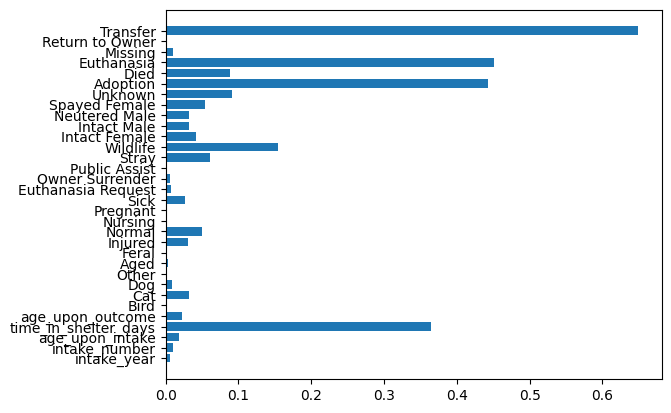

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

skb = SelectKBest(mutual_info_classif, k=2)
X_new = skb.fit_transform(X, y)

print("Odabrane značajke: ")
print(skb.get_feature_names_out())
scores = skb.scores_

dt = DecisionTreeClassifier(criterion="gini", max_depth=5, splitter="best").fit(
    X_new, y
)

lst = []
for col in X.columns:
    lst.append(col)
plt.barh(lst, scores)

Odaberite $K$ najbolje rangiranih značajki te trenirajte klasifikatore na podskupu za treniranje koristeći odabrane značajke. Možete koristiti najbolje klasifikatore iz Zadatka 2. Samostalno odaberite prikladnu vrijednost za $K$. Usporedite performanse ovih klasifikatora na podskupu za testiranje prije i nakon odabira značajki.  

In [ ]:
dt = DecisionTreeClassifier(criterion="gini", max_depth=5, splitter="best").fit(
    X_train, y_train
)
print("Prije FS: ", accuracy_score(y_test, dt.predict(X_test)))

skb = SelectKBest(mutual_info_classif, k=6)

X_new = skb.fit_transform(X_train, y_train)
X_test_new = skb.transform(X_test)

print("Odabrane značajke: ")
print(skb.get_feature_names_out())

dt = DecisionTreeClassifier(criterion="gini", max_depth=10, splitter="best").fit(
    X_new, y_train
)
print("Nakon FS: ", accuracy_score(y_test, dt.predict(X_test_new)))

Prije FS:  0.9998624484181569
Odabrane značajke: 
['time_in_shelter_days' 'Wildlife' 'Unknown' 'Adoption' 'Euthanasia'
 'Transfer']
Nakon FS:  0.9987620357634113


## **Zadatak 4: Odabir značajki - omotači**


Podijelite uređeni skup podataka na podskupove za treniranje i testiranje u omjeru 80:20 (koristite isto stanje nasumičnosti kao i u Zadatku 2). Zatim dodatno podijelite podskup za treniranje na podskupove za treniranje i vrednovanje u omjeru 65:35. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 64)

In [ ]:
X_train1, X_val, y_train1, y_val = train_test_split(X,y,test_size = 0.35, random_state = 64)

Pomoću omotača SFS provedite odabir značajki za promatrani skup podataka. Isprobajte nekoliko različitih vrijednosti za konačan broj značajki, vodeći se performansama klasifikatora. Možete koristiti najbolji klasifikator iz Zadatka 2 za vrednovanje podskupova značajki. Napomena: klasifikator trenirajte na podskupu za trening, a podskupove značajki koje stvara SFS vrednujte na podskupu za vrednovanje.

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

dt = DecisionTreeClassifier(criterion="gini", max_depth=5, splitter="best").fit(
    X_train, y_train
)
sfs = SequentialFeatureSelector(
    dt,
    n_features_to_select=3,
    direction="forward",
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
)
sfs.fit(X_val, y_val)
np.arange(X.shape[1])[sfs.support_]  # indeksi odabranih parametara


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

array([26, 27, 28])

Najbolje klasifikatore iz Zadatka 2 trenirajte na objedinjenom podskupu za treniranje i vrednovanje, koristeći odabrane značajke iz ovog zadatka. Usporedite performanse ovih klasifikatora na podskupu za testiranje prije i nakon odabira značajki.

In [ ]:
X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)
dt.fit(X_train_sfs, y_train)
y_pred_sfs = dt.predict(X_test_sfs)
sfs_score = accuracy_score(y_test, y_pred_sfs)

dt = DecisionTreeClassifier(criterion="gini", max_depth=5, splitter="best")
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
score = accuracy_score(y_test, y_pred)

print("Sa sfs-om", sfs_score)
print("Bez sfs-a", score)

Sa sfs-om 0.9988995873452545
Bez sfs-a 0.9998624484181569


Pri različitim izborima značajki najbolje mi je ispalo sa 3, a ne sa prethodno izabranih 6. 

## **Zadatak 5: Preuzorkovanje**

Podijelite uređeni skup podataka na podskupove za treniranje i testiranje u omjeru 80:20 (koristite isto stanje nasumičnosti kao i u Zadatku 2).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 64)

Pomoću metode nasumičnog preuzorkovanja provedite preuzorkovanje podskupa za treniranje.

In [ ]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy="minority")
X_new, y_new = oversample.fit_resample(X_train, y_train)

Najbolje klasifikatore iz Zadatka 2 trenirajte na preuzorkovanom podskupu za treniranje. Usporedite performanse ovih klasifikatora na podskupu za testiranje prije i nakon preuzorkovanja. 

In [ ]:
dt = DecisionTreeClassifier(criterion="gini", max_depth=5, splitter="best").fit(
    X_train, y_train
)
y_pred = dt.predict(X_test)
print("Bez metode nasumicnog preuzorkovanja", accuracy_score(y_test, y_pred))

dt = DecisionTreeClassifier(criterion="gini", max_depth=5, splitter="best").fit(
    X_new, y_new
)
y_pred_post = dt.predict(X_test)
print("Metoda nasumicnog preuzorkovanja", accuracy_score(y_test, y_pred_post))

Bez metode nasumicnog preuzorkovanja 0.9998624484181569
Metoda nasumicnog preuzorkovanja 0.9998624484181569


Manjinsku klasu povećava. Nije stvorilo poboljšanje u točnosti.